<a href="https://colab.research.google.com/github/heinrihs-s/Synthetic-IoT-network/blob/main/trafficEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import tensorflow #ML
import sklearn #ML
from sklearn.preprocessing import LabelEncoder, StandardScaler #ML

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

from google.colab import drive

!cp "/content/drive/My Drive/pcap2csv.csv" "pcap2csv.csv"

data = pd.read_csv("pcap2csv.csv")
data.head()


cp: cannot stat '/content/drive/My Drive/pcap2csv.csv': No such file or directory


,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,label
0,174.219.192.168,0,0.154.10.16,0,0,19/07/2022 04:17:24 AM,4000305,2,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,Normal
1,246.47.192.168,0,0.154.10.16,0,0,17/07/2022 08:37:17 AM,3999415,2,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,Normal
2,58.0.192.168,0,0.154.10.16,0,0,17/07/2022 07:02:04 PM,4000344,2,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,Normal
3,60.216.192.168,0,0.174.10.16,0,0,18/07/2022 07:09:36 AM,4000344,2,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,Normal
4,216.185.192.168,0,0.155.10.16,0,0,19/07/2022 09:03:33 AM,6000475,2,0,0,...,0,0,0,0,0,6000475.0,0.0,6000475.0,6000475.0,Normal


In [2]:
data.columns

Index(['Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol', 'Timestamp',
       'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts',
       'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min',
       'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max',
       'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s',
       'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Len',
       'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min',
       'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var',
       'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt',
       'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt',
       

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

data.isna().sum()

Src_IP               0
Src_Port             0
Dst_IP               0
Dst_Port             0
Protocol             0
Timestamp            0
Flow_Duration        0
Tot_Fwd_Pkts         0
Tot_Bwd_Pkts         0
TotLen_Fwd_Pkts      0
TotLen_Bwd_Pkts      0
Fwd_Pkt_Len_Max      0
Fwd_Pkt_Len_Min      0
Fwd_Pkt_Len_Mean     0
Fwd_Pkt_Len_Std      0
Bwd_Pkt_Len_Max      0
Bwd_Pkt_Len_Min      0
Bwd_Pkt_Len_Mean     0
Bwd_Pkt_Len_Std      0
Flow_Byts/s          0
Flow_Pkts/s          0
Flow_IAT_Mean        0
Flow_IAT_Std         0
Flow_IAT_Max         0
Flow_IAT_Min         0
Fwd_IAT_Tot          0
Fwd_IAT_Mean         0
Fwd_IAT_Std          0
Fwd_IAT_Max          0
Fwd_IAT_Min          0
Bwd_IAT_Tot          0
Bwd_IAT_Mean         0
Bwd_IAT_Std          0
Bwd_IAT_Max          0
Bwd_IAT_Min          0
Fwd_PSH_Flags        0
Bwd_PSH_Flags        0
Fwd_URG_Flags        0
Bwd_URG_Flags        0
Fwd_Header_Len       0
Bwd_Header_Len       0
Fwd_Pkts/s           0
Bwd_Pkts/s           0
Pkt_Len_Min

In [4]:
data.dtypes

Src_IP                object
Src_Port               int64
Dst_IP                object
Dst_Port               int64
Protocol               int64
Timestamp             object
Flow_Duration          int64
Tot_Fwd_Pkts           int64
Tot_Bwd_Pkts           int64
TotLen_Fwd_Pkts        int64
TotLen_Bwd_Pkts        int64
Fwd_Pkt_Len_Max        int64
Fwd_Pkt_Len_Min        int64
Fwd_Pkt_Len_Mean     float64
Fwd_Pkt_Len_Std      float64
Bwd_Pkt_Len_Max        int64
Bwd_Pkt_Len_Min        int64
Bwd_Pkt_Len_Mean     float64
Bwd_Pkt_Len_Std      float64
Flow_Byts/s           object
Flow_Pkts/s           object
Flow_IAT_Mean        float64
Flow_IAT_Std         float64
Flow_IAT_Max           int64
Flow_IAT_Min           int64
Fwd_IAT_Tot            int64
Fwd_IAT_Mean         float64
Fwd_IAT_Std          float64
Fwd_IAT_Max            int64
Fwd_IAT_Min            int64
Bwd_IAT_Tot            int64
Bwd_IAT_Mean         float64
Bwd_IAT_Std          float64
Bwd_IAT_Max            int64
Bwd_IAT_Min   

In [5]:
data["Flow_Byts/s"] = pd.to_numeric(data["Flow_Byts/s"], errors='coerce').astype('float64')
data["Flow_Pkts/s"] = pd.to_numeric(data["Flow_Byts/s"], errors='coerce').astype('float64')

In [6]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()
data = data.reset_index()

In [7]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 526071 rows and 84 columns


In [8]:
data.label.value_counts()

Normal      445533
Abnormal     80538
Name: label, dtype: int64

In [9]:
data=data.drop(columns = ["Src_IP", "Src_Port", "Dst_IP", "Dst_Port", "Timestamp"])

In [10]:
data.head()

,index,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,label
0,0,0,4000305,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,4080311.10,0.0,4000305,4000305,4000305,4000305.0,0.0,4000305,4000305,0,0.0,0.0,0,0,0,0,0,0,0,0,0.499962,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Normal
1,1,0,3999415,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,4079403.30,0.0,3999415,3999415,3999415,3999415.0,0.0,3999415,3999415,0,0.0,0.0,0,0,0,0,0,0,0,0,0.500073,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Normal
2,2,0,4000344,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,4080350.88,0.0,4000344,4000344,4000344,4000344.0,0.0,4000344,4000344,0,0.0,0.0,0,0,0,0,0,0,0,0,0.499957,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Normal
3,3,0,4000344,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,4080350.88,0.0,4000344,4000344,4000344,4000344.0,0.0,4000344,4000344,0,0.0,0.0,0,0,0,0,0,0,0,0,0.499957,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Normal
4,4,0,6000475,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,6120484.50,0.0,6000475,6000475,6000475,6000475.0,0.0,6000475,6000475,0,0.0,0.0,0,0,0,0,0,0,0,0,0.333307,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6000475.0,0.0,6000475.0,6000475.0,Normal


In [11]:
#normalize labels
from sklearn.preprocessing import LabelEncoder

col = ["label"]
enc = LabelEncoder()
for col_name in col:
    data[col_name]=enc.fit_transform(data[col_name])

In [12]:
data_y = data["label"]
data_x = data.drop(columns = ["label", 	"Idle_Mean",	"Idle_Std",	"Idle_Max",	"Idle_Min", "Subflow_Bwd_Byts",	"Init_Fwd_Win_Byts",	"Init_Bwd_Win_Byts",	"Fwd_Act_Data_Pkts",	"Fwd_Seg_Size_Min"])

In [13]:
import random
from sklearn.model_selection import train_test_split

data_y.sample(frac=1)
data_x.sample(frac=1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_x, data_y, test_size=0.3)

In [14]:
#Naive Bayes algorithm

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
accuracy = accuracy_score(pred, y_test)
precision = precision_score(y_test, pred, average='weighted')
sensitivity = recall_score(y_test , pred)
specificity = recall_score(np.logical_not(y_test) , np.logical_not(pred))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print(classification_report(y_test,pred, labels=None))
cm=confusion_matrix(y_test, pred)
print(cm)

Accuracy: 0.9592895793995767
Precision: 0.9673230167220345
Sensitivity: 0.9529922202274087
Specificity: 0.9941595559605666
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     24142
           1       1.00      0.95      0.98    133680

    accuracy                           0.96    157822
   macro avg       0.90      0.97      0.93    157822
weighted avg       0.97      0.96      0.96    157822

[[ 24001    141]
 [  6284 127396]]


In [16]:
# decision tree

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(clf)
print(classification_report(pred, y_test, labels=None))
accuracy = accuracy_score(pred, y_test)
precision = precision_score(pred, y_test, average='weighted')
sensitivity = recall_score(y_test , pred)
specificity = recall_score(np.logical_not(y_test) , np.logical_not(pred))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

cm=confusion_matrix(y_test, pred)
print(cm)

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24144
           1       1.00      1.00      1.00    133678

    accuracy                           1.00    157822
   macro avg       1.00      1.00      1.00    157822
weighted avg       1.00      1.00      1.00    157822

Accuracy: 0.9999746549910659
Precision: 0.9999746547505425
Sensitivity: 0.9999775583482944
Specificity: 0.9999585784110678
[[ 24141      1]
 [     3 133677]]


In [17]:
# random forest 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred=rdF.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(pred,y_test)
precision = precision_score(pred, y_test)
sensitivity = recall_score(y_test , pred)
specificity = recall_score(np.logical_not(y_test) , np.logical_not(pred))

print(rdF)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print(cohen_kappa_score(y_test, pred))
print(cm)

RandomForestClassifier(max_depth=50, n_estimators=250, random_state=45)
0.9981244693388754
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24142
           1       1.00      1.00      1.00    133680

    accuracy                           1.00    157822
   macro avg       1.00      1.00      1.00    157822
weighted avg       1.00      1.00      1.00    157822

Accuracy: 0.9981244693388754
Precision: 0.9989228007181329
Sensitivity: 0.9989228007181329
Specificity: 0.993703918482313
0.9927615006251604
[[ 23990    152]
 [   144 133536]]


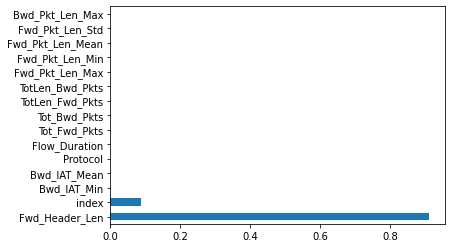

In [20]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [18]:
# most important features from recursive feature elimination with cross-validation

from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from numpy import mean
from numpy import std

# pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



Accuracy: 1.000 (0.000)


In [19]:
# report which features were selected by RFE

from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X_train, y_train)
# summarize all features
for i in range(X_train.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 12.000
Column: 2, Selected False, Rank: 11.000
Column: 3, Selected False, Rank: 10.000
Column: 4, Selected False, Rank: 9.000
Column: 5, Selected False, Rank: 8.000
Column: 6, Selected False, Rank: 7.000
Column: 7, Selected False, Rank: 6.000
Column: 8, Selected False, Rank: 14.000
Column: 9, Selected False, Rank: 16.000
Column: 10, Selected False, Rank: 18.000
Column: 11, Selected False, Rank: 20.000
Column: 12, Selected False, Rank: 22.000
Column: 13, Selected False, Rank: 24.000
Column: 14, Selected False, Rank: 26.000
Column: 15, Selected False, Rank: 28.000
Column: 16, Selected False, Rank: 30.000
Column: 17, Selected False, Rank: 32.000
Column: 18, Selected False, Rank: 34.000
Column: 19, Selected False, Rank: 36.000
Column: 20, Selected False, Rank: 38.000
Column: 21, Selected False, Rank: 40.000
Column: 22, Selected False, Rank: 42.000
Column: 23, Selected False, Rank: 44.000
Column: 24, Selected False, Rank

In [25]:
myList = list(data_x.columns)
index = 0

for value in myList:
     print(index, value)
     index += 1

0 index
1 Protocol
2 Flow_Duration
3 Tot_Fwd_Pkts
4 Tot_Bwd_Pkts
5 TotLen_Fwd_Pkts
6 TotLen_Bwd_Pkts
7 Fwd_Pkt_Len_Max
8 Fwd_Pkt_Len_Min
9 Fwd_Pkt_Len_Mean
10 Fwd_Pkt_Len_Std
11 Bwd_Pkt_Len_Max
12 Bwd_Pkt_Len_Min
13 Bwd_Pkt_Len_Mean
14 Bwd_Pkt_Len_Std
15 Flow_Byts/s
16 Flow_Pkts/s
17 Flow_IAT_Mean
18 Flow_IAT_Std
19 Flow_IAT_Max
20 Flow_IAT_Min
21 Fwd_IAT_Tot
22 Fwd_IAT_Mean
23 Fwd_IAT_Std
24 Fwd_IAT_Max
25 Fwd_IAT_Min
26 Bwd_IAT_Tot
27 Bwd_IAT_Mean
28 Bwd_IAT_Std
29 Bwd_IAT_Max
30 Bwd_IAT_Min
31 Fwd_PSH_Flags
32 Bwd_PSH_Flags
33 Fwd_URG_Flags
34 Bwd_URG_Flags
35 Fwd_Header_Len
36 Bwd_Header_Len
37 Fwd_Pkts/s
38 Bwd_Pkts/s
39 Pkt_Len_Min
40 Pkt_Len_Max
41 Pkt_Len_Mean
42 Pkt_Len_Std
43 Pkt_Len_Var
44 FIN_Flag_Cnt
45 SYN_Flag_Cnt
46 RST_Flag_Cnt
47 PSH_Flag_Cnt
48 ACK_Flag_Cnt
49 URG_Flag_Cnt
50 CWE_Flag_Count
51 ECE_Flag_Cnt
52 Down/Up_Ratio
53 Pkt_Size_Avg
54 Fwd_Seg_Size_Avg
55 Bwd_Seg_Size_Avg
56 Fwd_Byts/b_Avg
57 Fwd_Pkts/b_Avg
58 Fwd_Blk_Rate_Avg
59 Bwd_Byts/b_Avg
60 Bwd_Pkts/b_Av